In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

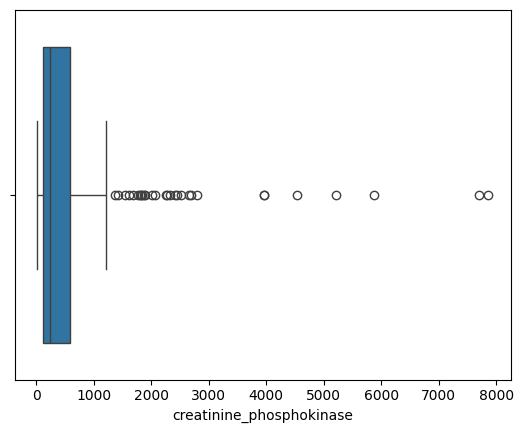

In [5]:
sns.boxplot(x=df["creatinine_phosphokinase"])
plt.show()

In [6]:
Q1 = df["creatinine_phosphokinase"].quantile(0.25)
Q3 = df["creatinine_phosphokinase"].quantile(0.75)

IQR = Q3-Q1
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

outliers = df[(df["creatinine_phosphokinase"]>upper) | (df["creatinine_phosphokinase"]<lower)]
outliers.shape

(29, 13)

In [8]:
df_cap = df.copy()

df_cap["creatinine_phosphokinase"] = np.where(df_cap["creatinine_phosphokinase"]>upper, upper, 
                                             np.where(df["creatinine_phosphokinase"]<lower, lower, df_cap["creatinine_phosphokinase"]))

df_cap.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582.00,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,1280.25,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146.00,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111.00,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160.00,1,20,0,327000.00,2.7,116,0,0,8,1


In [9]:
df_log = df.copy()

df_log["creatinine_phosphokinase"] = np.log(df["creatinine_phosphokinase"]+1)
df_log.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,6.368187,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,8.969796,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,4.990433,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,4.718499,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,5.081404,1,20,0,327000.00,2.7,116,0,0,8,1


In [12]:
df_imp = df.copy()

median = df_imp["creatinine_phosphokinase"].median()
df_imp.loc[(df["creatinine_phosphokinase"]>upper) | (df["creatinine_phosphokinase"]<lower), "creatinine_phosphokinase"] = median

df_imp.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,250,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
